# plot

In [1]:
from getdist import loadMCSamples, plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
samp = loadMCSamples('/home/wangsy2/fs_const/galaxy/chains515/frb515')

<Figure size 500x375 with 0 Axes>

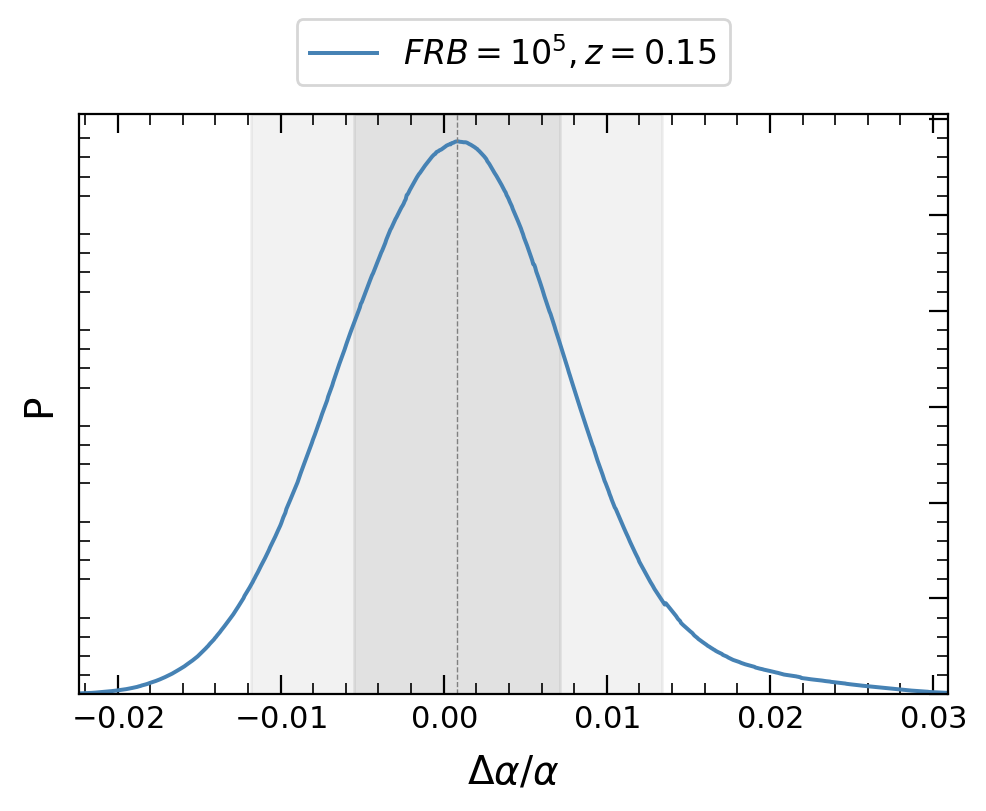

In [17]:
g = plots.get_single_plotter(width_inch=5)
g.plots_1d(samp, ['alpha'], nx=1,normalized=True, markers={'alpha':0.0008}, colors=['steelblue'],legend_labels=[r'$FRB=10^5, z=0.15$'], legend_loc = 'right')

for ax in g.subplots[:, :].flat:
    if ax is not None:  # check ax is None or not
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='minor', length=4)
        ax.tick_params(which='major', length=7)

g.add_x_bands(0.0008, 0.0063)

g.export('g515.pdf')

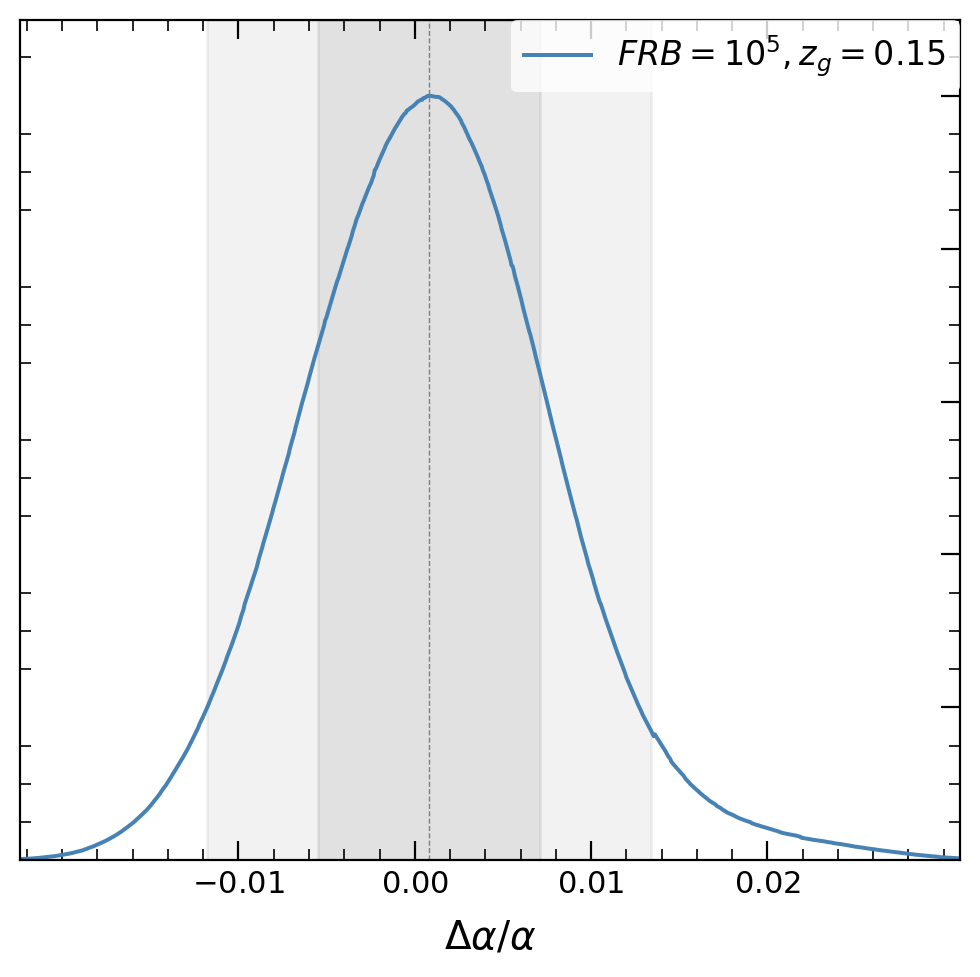

In [2]:
g=plots.get_subplot_plotter(chain_dir=['/home/wangsy2/fs_const/galaxy/chains515'], width_inch=5)
roots = ['frb515']
params = ['alpha']

g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.8
g.settings.title_limit_fontsize = 14

g.triangle_plot(roots, params, filled=True, legend_labels=[r'$FRB=10^5, z_g=0.15$'], 
                markers={'alpha':0.0008}, contour_colors=['steelblue'])
g.settings.legend_fontsize = 20 # Set the legend font size
g.settings.axes_fontsize = 20  # Set the axis label font size
g.add_x_bands(0.0008, 0.0063)


for ax in g.subplots[:, :].flat:
    if ax is not None:  # check ax is None or not
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='minor', length=4)
        ax.tick_params(which='major', length=7)
        
        #ax.set_xlabel(r'$\frac{\Delta \alpha} {\alpha}$', fontsize=15)
        #ax.legend(fontsize=15)

g.export('g515.pdf')

In [25]:
from getdist import loadMCSamples, plots
import numpy as np

samp = loadMCSamples('/home/wangsy2/fs_const/galaxy/chains515/frb515')
p = samp.getParams() 
samp.addDerived(np.sqrt(1+p.alpha), name='eta', label=r'\eta')
samp.addDerived(-np.log(1.+0.12*p.alpha)/np.log(1.15), name='beta', label=r'\beta')
samp.addDerived((0.8*278-0.2*742)*p.alpha, name='mu', label=r'\Delta \mu / \mu')


In [4]:
print(samp.getInlineLatex('alpha',limit=2))
print(samp.getInlineLatex('alpha',limit=1))

\Delta \alpha / \alpha = 0.001^{+0.014}_{-0.014}
\Delta \alpha / \alpha = 0.0008^{+0.0063}_{-0.0073}


In [22]:
print(samp.getInlineLatex('eta',limit=2))
print(samp.getInlineLatex('beta',limit=2))
print(samp.getInlineLatex('eta',limit=1))
print(samp.getInlineLatex('beta',limit=1))
print(samp.getInlineLatex('mu',limit=2))
print(samp.getInlineLatex('mu',limit=1))

\eta = 1.0004^{+0.0070}_{-0.0072}
\beta = -0.001^{+0.012}_{-0.012}
\eta = 1.0004^{+0.0032}_{-0.0036}
\beta = -0.0007^{+0.0062}_{-0.0055}
\mu = 0.1^{+1.0}_{-1.1}
\mu = 0.06^{+0.47}_{-0.54}


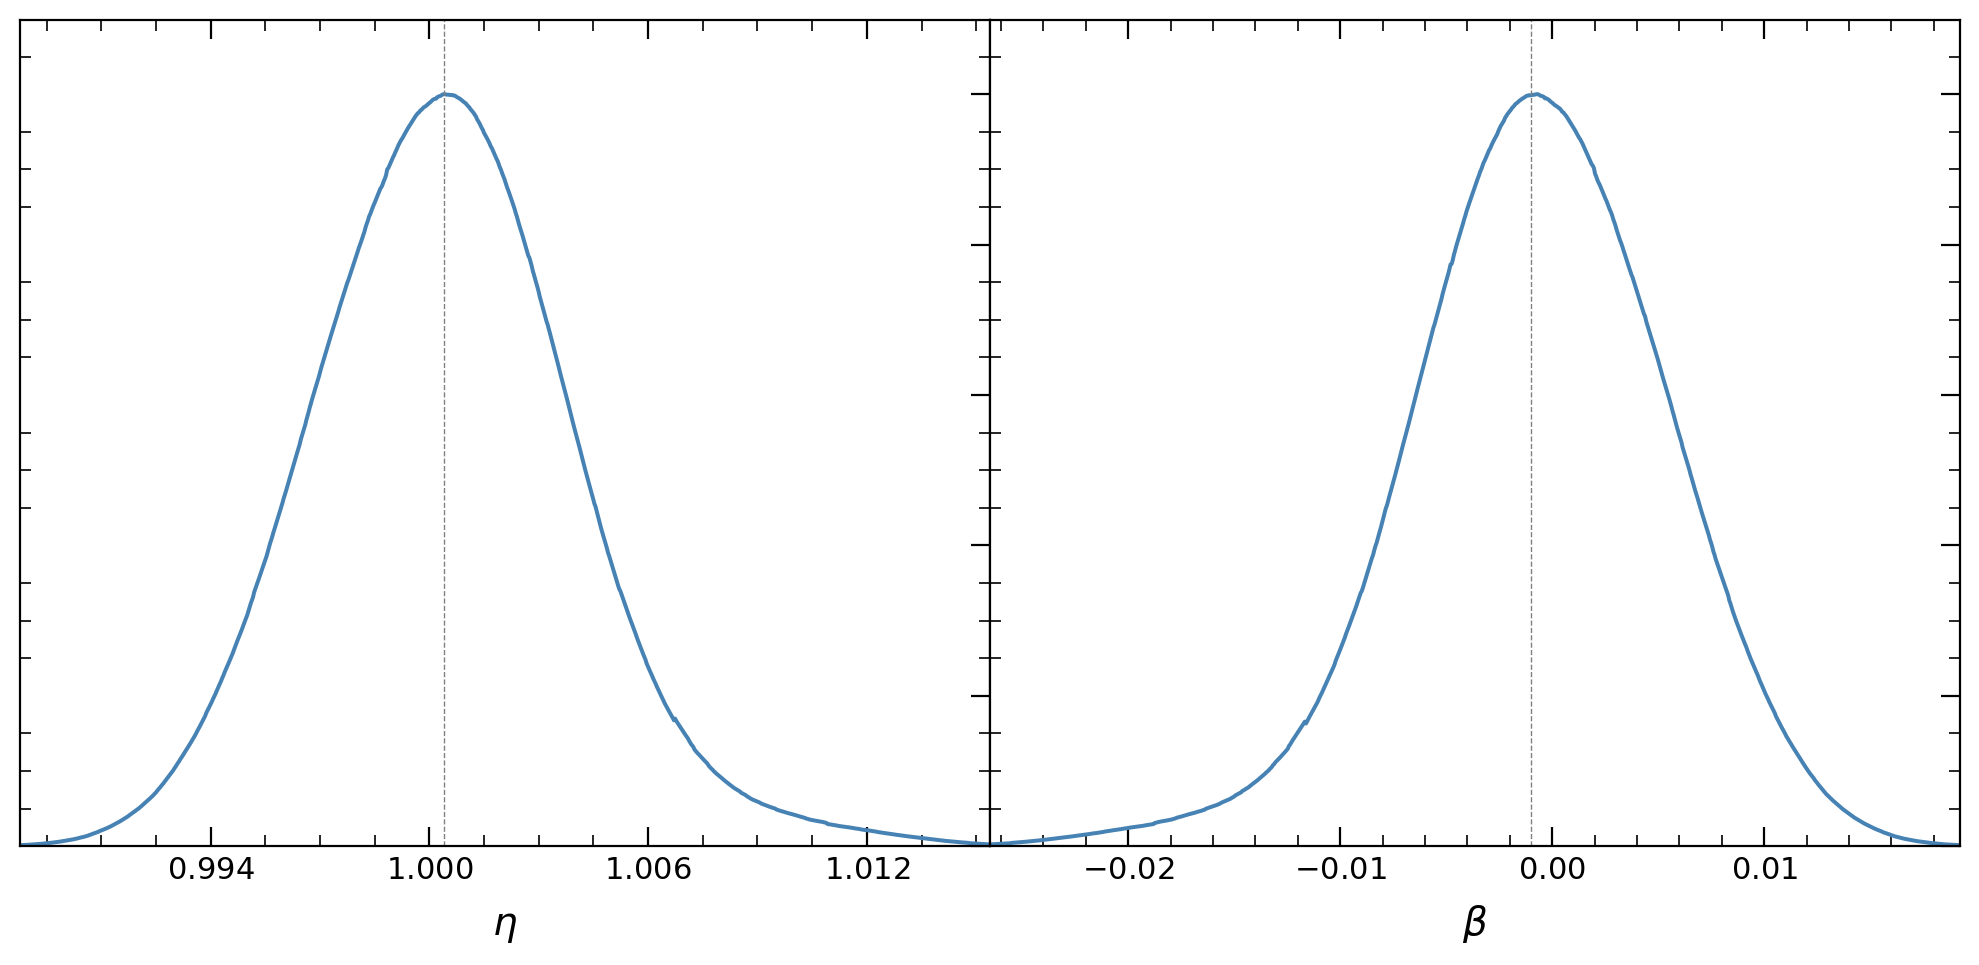

In [24]:
g = plots.get_subplot_plotter(subplot_size=5)
g.plots_1d([samp], ['eta','beta'], nx=2, share_y=True, markers={'eta': 1.0004, 'beta':-0.001}, colors=['steelblue'])

for ax in g.subplots[:, :].flat:
    if ax is not None:  # check ax is None or not
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='minor', length=4)
        ax.tick_params(which='major', length=7)
#g.add_x_bands(1.0004, 0.0032)
g.export('ex.pdf')

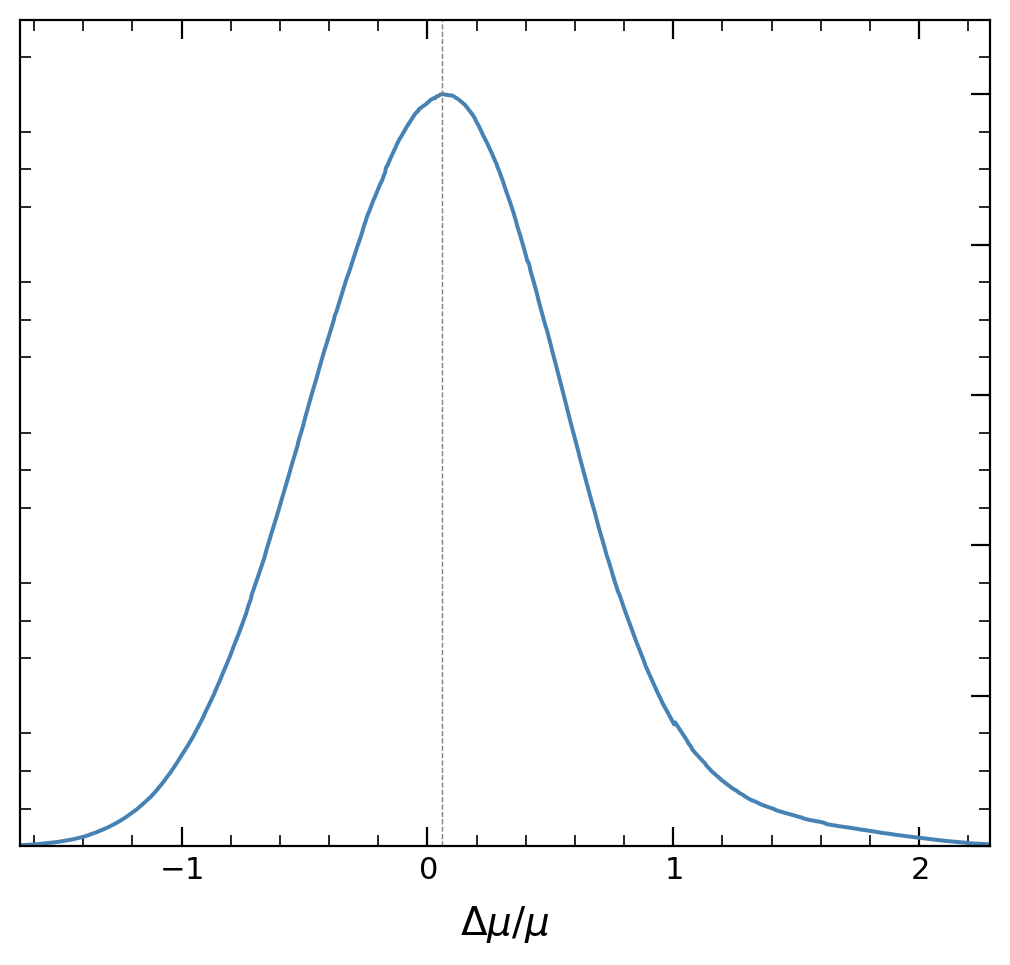

In [26]:
g = plots.get_subplot_plotter(subplot_size=5)
g.plots_1d([samp], ['mu'], nx=2, share_y=True, markers={'mu': 0.06}, colors=['steelblue'])

for ax in g.subplots[:, :].flat:
    if ax is not None:  # chexk ax is None or not
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='minor', length=4)
        ax.tick_params(which='major', length=7)
#g.add_x_bands(1.0004, 0.0032)
g.export('ex1.pdf')

## Two methods to calculate DM

### $n_1(z) = \frac{\rho_{b0}}{m_p} \cdot (1 + z) \cdot f_{\text{igm}} \cdot \left(1 - \frac{Y}{2}\right)$

### $n_2(z) = (1+z) \cdot \left[ \frac{1 - Y_p\left(1 - \frac{N_{\text{He}}}{4}\right)}{1 - \frac{Y_p}{2}} \right] \cdot \frac{3 (f_{\text{gas}} \Omega_{b}h^2) H_{100}^2}{8 \pi G m_p \mu_e}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from colossus import utils
from colossus.cosmology import cosmology
cosmo=cosmology.setCosmology('planck18')

In [2]:
constants1 = {
    'rhob0': 4.2e-25, #g/m^3
    'mp': utils.constants.M_PROTON, #1.672621898e-24(g)
    'Y': 0.24,
    'figm': 0.75
}

def n1(zz):
    return constants1['rhob0']/constants1['mp']*(1.+zz)*constants1['figm']*(1.-0.5*constants1['Y'])

In [3]:
constants2 = {
    'G_SI': 6.674e-11,
    'mProton_SI': 1.673e-27,
    'H100_SI': 3.241e-18
}

def chi(Yp,NHe):
    val = (1-Yp*(1-NHe/4.))/(1-Yp/2.)
    return val

def ne0_(Yp=0.24,NHe=0,gasfrac = 0.9):
    '''
    Average electron density today
    Eq 3 of 1109.0553
    Units: 1/meter**3
    '''
    ombh2 = cosmo.Ombh2
    omgh2 = gasfrac* ombh2
    mu_e = 1.14 # mu_e*mass_proton = mean mass per electron
    ne0_SI = chi(Yp,NHe)*omgh2 * 3.*(constants2['H100_SI']**2.)/constants2['mProton_SI']/8./np.pi/constants2['G_SI']/mu_e
    return ne0_SI

def n2(zz):
    return (1.+zz)*ne0_()

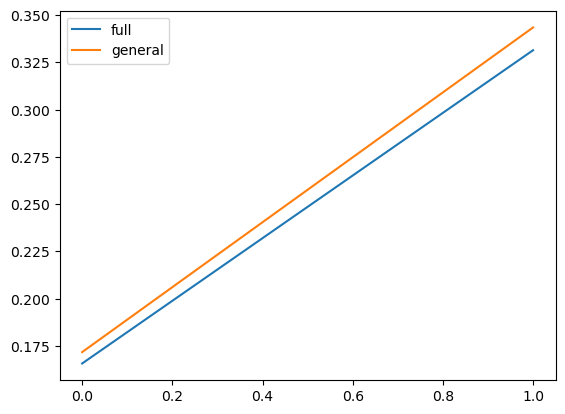

In [4]:
z = np.linspace(0,1,20)
plt.plot(z, n1(z), label='full')
plt.plot(z, n2(z), label='general')
plt.legend()
plt.show()

# Cl

In [ ]:
from cobaya.run import run
import numpy as np
from colossus.cosmology import cosmology
cosmo=cosmology.setCosmology('planck18')
h = cosmo.H0/100


import hmvec as hm
import Func

## different from galaxies
zg=0.15
ngal = 3.4e-2*h**3    # /Mpc^3, 3.2e-2 1.1e-2 5.5e-3
fsky=17500./41253.
dz = 0.15
sigmaD = 300
Nfrb = 1e+5
zfrb = zg+dz+0.1

## fixed
zs = np.linspace(0.,1.,101)
ms = np.geomspace(2e10,1e17,200)
c = 3e+5  #km/s
c_speed = c
ne0 = Func.ne0_()    #1/m^3 0.17174573422830966
chig = cosmo.comovingDistance(0.,zg)/h # Mpc
dchig = cosmo.comovingDistance(z_min=zg-dz,z_max=zg+dz)/h   # Mpc
V = Func.Vs(fsky,zg-dz,zg+dz)

l_max = 500
ell_values = np.arange(l_max)[2:]
kk = ell_values/chig

index = np.where(zs==zg)[0].astype(int)

## init setting for halo model
hcos1 = hm.HaloModel(zs,kk,ms=ms)
hcos1.add_hod("g",ngal=ngal+zs*0.,corr="max")
hcos1.add_battaglia_profile("electron",family="AGN",xmax=20,nxs=5000)


def Clge(alpha):
    pge_1h = hcos1.get_power_1halo(name="g", name2="electron")[index,:][0,:]
    pge_2h = hcos1.get_power_2halo(name="g", name2="electron")[index,:][0,:]
    pge = pge_1h + pge_2h

    cldg = ne0*(1+zg)/chig**2*pge * (1+alpha)

    return cldg

In [ ]:
clge0 = Clge(0.)
clge1 = Clge(0.05)
clge2 = Clge(-0.05)

# Noise

In [ ]:
nl_dg2 = np.loadtxt('/home/wangsy2/fs_const/galaxy/nl_dg2_515.txt', delimiter=' ', dtype='str').astype(float)
nldg = np.sqrt(nl_dg2)

In [ ]:
indices = np.arange(10, 499, 10)

ell_bin = ell_values[indices]
clgd0_bin1 = clge0[indices]

clgd0_bin = []
for idx in indices:
    # For each index, take the 10 elements before and after it
    group = clge0[idx-10:idx]  # Fetch the elements of each group (note that the index starts at 0, so IDX-10 to idx here)
    clgd0_bin.append(np.mean(group))

In [ ]:
import matplotlib.pyplot as plt

plt.errorbar(ell_bin, clgd0_bin1, yerr=1./np.sqrt((1.+2.*ell_bin)*fsky)*clgd0_bin, fmt='o', markersize=2, alpha=0.8, color='gray',capsize=3)
plt.plot(ell_values, clge1, linewidth=1, label=r'$\frac{\Delta \alpha}{\alpha}=0.05$')
plt.plot(ell_values, clge0, linewidth=1, label=r'$\frac{\Delta \alpha}{\alpha}=0$')
plt.plot(ell_values, clge2, linewidth=1, label=r'$\frac{\Delta \alpha}{\alpha}=-0.05$')


plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel(r'$\ell$', fontsize=15)
plt.ylabel(r'$C_{\ell}^\text{Dg}(\text{pc}/\text{cm}^3)$', fontsize=15)
plt.tick_params(which='both',direction='in')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([10, 500])

plt.savefig('cl.pdf', bbox_inches='tight')